### 1. Data Importing and Pre-processing
#### **Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used**

In [103]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#checking primary working directory

In [104]:
pwd #checking primary working directory

'/Users/nwentworth/Desktop/Final Project'

In [105]:
#import the file using pandas reader
df=pd.read_csv('online_shoppers_intention.csv', header=0)

In [106]:
#read column headers, data types, and data shape

In [107]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [108]:
df.dtypes #reading the data types

Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [109]:
print('Number of rows in data set:',df.shape[0])
print('Number of columns in data set:',df.shape[1])

Number of rows in data set: 12330
Number of columns in data set: 18


#### **Clean, wrangle, and handle missing data**

In [110]:
#identify amount of NA data by column
print(df.isnull().sum())

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64


In [111]:
#Investigating the informational column first. Hypothesis is that Informational and Informational_Duration are connected in that 
#Informational is a categorical variable and Informational_Duration provides the time spent on an informational page. Therefore, if
#Informational_Duration = 0, Informational should equal 0. If they are not 0, may need to replace with mode. 
#First, look at the null values of informational column: 
df_info_null=df[df['Informational'].isnull()]
df_infodur_0=df_info_null['Informational_Duration']
df_infodur_0.value_counts()

Informational_Duration
0.000000      104
7.000000        1
32.666667       1
360.166667      1
193.166667      1
11.000000       1
111.166667      1
243.283333      1
13.000000       1
28.500000       1
703.500000      1
186.233333      1
37.200000       1
77.000000       1
6.000000        1
8.000000        1
18.000000       1
89.000000       1
236.000000      1
500.000000      1
250.666667      1
44.500000       1
47.000000       1
75.250000       1
9.000000        1
Name: count, dtype: int64

In [112]:
#Seeing here that null values for Informational do span both 0 and non-zero Info_Duration values. Investigating 0 values next:
#filter the data frame for just Info = 0 values
df_infodur_0=df[df['Informational_Duration']==0]

In [113]:
info_value0=df_infodur_0['Informational']

In [114]:
#find the unique values and their counts of Informational when Info_Duration = 0
info_value0.value_counts()

Informational
0.0    9599
1.0     213
2.0       9
Name: count, dtype: int64

In [115]:
#Investigating the other direction: when Informational = 0, are their non-0 values of Info_Duration?
df_info0=df[df['Informational']==0]
info_dur0=df_info0['Informational_Duration']
info_dur0.value_counts()

Informational_Duration
0.0    9599
Name: count, dtype: int64

In [116]:
df_info_not0=df[df['Informational_Duration']>0] #create a dataframe of rows with non-zero Info_Duration 
info_mode_not0=df_info_not0['Informational'].mode() #find the mode of this dataframe
info_mode_not0

0    1.0
Name: Informational, dtype: float64

In [117]:
#Given the above infomation, the vast majority of Info and Info_Duration 0/0 values and the non-zero mode of 1, 
#concluding that it is best to fill with differing mode values depending on the Informational_Duration column
#i.e: if Informational Duration = 0, fill NaN values with 0 (mode). if Informational Duration >0, fill NaN values with 1 (non zero mode)

In [118]:
#locate the lines where Informational is null and Info_Duration is 0:
df_info_00=df.loc[(df['Informational'].isnull())&(df['Informational_Duration']==0)]

In [121]:
#df_info_00.head(5) #checking

In [125]:
#fill only null informational values with 0 (mode) if Info Duration is 0
df.loc[(df['Informational_Duration']==0) & (df['Informational'].isna()), 'Informational']=0

In [126]:
#check to see this filled some null values
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational               24
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [127]:
#fill rest of informational values with non-0 (mode) if Info Duration is >0 (see variable info_mode_not0)
df.loc[(df['Informational_Duration']>0) & (df['Informational'].isna()), 'Informational']= 1

In [128]:
#check to see this filled the null values
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [131]:
#next, investigating Page Values for filling NA:
df['PageValues'].nunique()

2681

In [133]:
#There are 2,681 unique values with Page Values. According to the notes on the data, "The "Page Value" feature represents the average 
#value for a web page that a user visited before completing an e-commerce transaction." 
#We do not know how "value" was determined. Opting to fill with mode given the column representation is unknown
df['PageValues'].mode()

0    0.0
Name: PageValues, dtype: float64

In [139]:
#checking to see if a dual mode makes sense for this column as well - if Revenue is False, is PageValue 0?
rev_false=df[df['Revenue']==False]
rev_false['PageValues'].nunique()
#no - Page Value can still have 1183 different values if Rev=False. Continuing with applying mode for full column

1183

In [140]:
#checking how many rows have a zero value for PageValues
len(df[df['PageValues']==0])

9491

In [141]:
#fill null PageValues with 0
df.loc[df['PageValues'].isna(), 'PageValues']= 0

In [142]:
df.isna().sum()

Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [144]:
#df.head(5)

In [146]:
#see how many unique values and their respective value counts exist for OperatingSystems
df['OperatingSystems'].value_counts()

OperatingSystems
2.0    6525
1.0    2567
3.0    2531
4.0     474
8.0      78
6.0      19
7.0       7
5.0       6
Name: count, dtype: int64

In [177]:
#see how many unique values and their respective value counts exist for OperatingSystems
df['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

In [178]:
#understand if there is a correlation between Operating System and Browser
correlation = df['OperatingSystems'].corr(df['Browser'])

In [179]:
correlation

np.float64(0.22462129276612294)

In [155]:
#too weak of a correlation, will use mode for Operating system as well
df['OperatingSystems'].mode()

0    2.0
Name: OperatingSystems, dtype: float64

In [156]:
#Filling Operating Sysem NAs with mode
df.loc[df['OperatingSystems'].isna(), 'OperatingSystems']= 2.0

In [157]:
#checking to see all NAs are filled 
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### **Transform data appropriately using techniques such as aggregation, normalization, and feature construction**

In [158]:
#combine _duration columns (aggregation)
df['Total_Duration'] = (
    df['Administrative_Duration']+
    df['Informational_Duration']+
    df['ProductRelated_Duration']
)

In [174]:
# z scaling (normalization)
standard_cols = ['BounceRates', 'ExitRates', 'PageValues']

means=df[standard_cols].mean()
stds=df[standard_cols].std(ddof=0)  # ddof=0 matches sklearn's StandardScaler

#apply Z-score scaling: (x - mean) / std
df[standard_cols] = (df[standard_cols] - means) / stds

#verify Z-scaling
check = pd.DataFrame({
    'mean': df[standard_cols].mean(),
    'std': df[standard_cols].std(ddof=0)
})
check

,mean,std
BounceRates,9.220344e-18,1.0
ExitRates,-4.610172e-18,1.0
PageValues,-1.844069e-17,1.0


In [175]:
#feature construction: engagement level

#classify engagement level based on newly aggregated total duration value
df['Engagement_Level'] = pd.cut(
    df['Total_Duration'],
    bins=[0,60,300,1200, df['Total_Duration'].max()],
    labels=['Very Low', 'Low', 'Medium', 'High'],
    include_lowest=True
)

In [185]:
#feature construction: special purchase
print(df['SpecialDay'].unique())
#if special day >0 & Revenue = true, special purchase will be true

[0.  0.4 0.8 1.  0.2 0.6]


In [186]:
def SpecialPurpose(row):
    if row['Revenue'] == True and row['SpecialDay'] >0:
        return True
    else:
        return False

In [187]:
df['SpecialPurchase'] = df.apply(SpecialPurpose, axis=1)

In [188]:
df.head(3) #checking column additionss

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Engagement_Level,SpecialPurchase
0,0,0.0,0.0,0.0,1,0.0,3.667189,3.229316,-0.315356,0.0,...,1.0,1,1,1,Returning_Visitor,False,False,0.0,Very Low,False
1,0,0.0,0.0,0.0,2,64.0,-0.457683,1.171473,-0.315356,0.0,...,2.0,2,1,2,Returning_Visitor,False,False,64.0,Low,False
2,0,0.0,0.0,0.0,1,0.0,3.667189,3.229316,-0.315356,0.0,...,4.0,1,9,3,Returning_Visitor,False,False,0.0,Very Low,False


#### **Reduce redundant data and perform need-based discretization**

In [221]:
#considering eliminating "PageValue"
#about page value: The "Page Value" feature represents the average value for a web page 
#that a user visited before completing an e-commerce transaction. 

In [222]:
#print(df['PageValues'].value_counts())
df['PageValues'].nunique()
#print(df['Revenue'].value_counts())
#PageValues, without the key, is not providing usable information without knowing more about the page valuations. Will remove for this analysis

2681

In [223]:
df_rev['PageValues'].nunique()

1504

In [225]:
#df.head(3)

In [226]:
#Similarly, Operating System and Browser are not relevant at this point

In [227]:
df['Administrative'].unique()
df_admin0=df[df['Administrative_Duration']>0]
df_admin0['Administrative'].unique()
#if administrative_duration is 0, administrative is also 0. Without information on the 
#page categories value, this information is duplicative

array([ 2,  4,  1, 12,  3, 10,  6,  5,  9,  8, 16, 13, 11,  7, 18, 14, 17,
       19, 15, 24, 22, 21, 20, 23, 27, 26])

In [228]:
df['Informational'].unique()
df_info0=df[df['Informational_Duration']>0]
df_info0['Informational'].unique()
#same situation as administrative

array([ 2.,  1.,  4., 16.,  5.,  3., 14.,  6., 12.,  7.,  9., 10.,  8.,
       11., 24., 13.])

In [229]:
df['ProductRelated'].unique()
df_product0 = df[df['ProductRelated_Duration']>0]
df_product0['ProductRelated'].unique()
#found that the same information is told but Product_Duration=0 is coded to Product=1 (instead of 0 like the other columns) 
#Without knowing the product coding for this categorical column I would also delete as it is duplicative

array([  2,  10,  19,   3,  16,   7,   6,  23,  13,  20,   8,   5,  32,
         4,  45,  14,  52,   9,  46,  15,  22,  11,  12,  36,  42,  27,
        90,  18,  38,  17, 128,  25,  30,  21,  51,  26,  28,  31,  24,
        50,  96,  49,  68,  98,  67,  55,  35,  37,  29,  34,  71,  63,
        87,  40,  33,   1,  54,  64,  75,  39, 111,  81,  61,  47,  44,
        88, 149,  41,  79,  66,  43, 258,  80,  62,  83, 173,  48,  58,
        57,  56,  69,  82,  59, 109, 287,  53,  84,  78, 137, 113,  89,
        65,  60, 104, 129,  77,  74,  93,  76,  72, 194, 140, 110, 132,
       115,  73, 328, 160,  86, 150,  95, 130, 151, 117, 124, 127, 125,
       116, 105,  92, 157, 154, 220, 187, 112, 131, 159,  94, 204, 142,
       206, 102, 313, 145,  85,  97, 198, 181, 126, 106, 101, 108, 119,
        70, 122,  91, 276, 100, 291, 114, 172, 217, 141, 133, 156, 136,
       180, 135, 195,  99, 362, 179, 118, 175, 148, 440, 103, 178, 184,
       705, 134, 176, 146, 189, 120, 193, 222, 121, 107, 305, 19

In [230]:
#drop columns that were decided not to have information necessary for the analysis
df_clean = df.drop(['PageValues','OperatingSystems','Browser','Administrative', 'Informational','ProductRelated'],axis='columns')
df_clean.head(2)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Engagement_Level,SpecialPurchase
0,0.0,0.0,0.0,3.667189,3.229316,0.0,Feb,1,1,Returning_Visitor,False,False,0.0,Very Low,False
1,0.0,0.0,64.0,-0.457683,1.171473,0.0,Feb,1,2,Returning_Visitor,False,False,64.0,Low,False


### 2. Data Analysis and Visualizations

#### **Identify categorical, ordinal, and numerical variables within the data**

In [233]:
#reviewing data types
df_clean.dtypes

Administrative_Duration     float64
Informational_Duration      float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
SpecialDay                  float64
Month                        object
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
Total_Duration              float64
Engagement_Level           category
SpecialPurchase                bool
dtype: object

In [234]:
#confirmed that all _Duration columns as well as BounceRates, ExitRates should be numerical
#Special Day should be recoded to categorical as it seems to be specifying a certain holiday based on the number/key
#Region is also categorical to a key
#understanding other columns: 
#"Traffic Type" column
df['TrafficType'].unique() #this looks to be a categorical variable to a key

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

In [235]:
#region and traffic type are both categorical variables. changing the data types to categorical
df_clean['Region']=df_clean['Region'].astype('category')
#df_clean.dtypes #checking

In [237]:
df_clean['TrafficType']=df_clean['TrafficType'].astype('category')
df_clean['SpecialDay']=df_clean['SpecialDay'].astype('category')
df_clean.dtypes

Administrative_Duration     float64
Informational_Duration      float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
SpecialDay                 category
Month                        object
Region                     category
TrafficType                category
VisitorType                  object
Weekend                        bool
Revenue                        bool
Total_Duration              float64
Engagement_Level           category
SpecialPurchase                bool
dtype: object

#### **Provide measures of centrality and distribution with visualizations**

#### **Diagnose for correlations between variables and determine independent and dependent variables**

#### **Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest**

In [209]:
import seaborn as sns

<Axes: xlabel='Month', ylabel='count'>

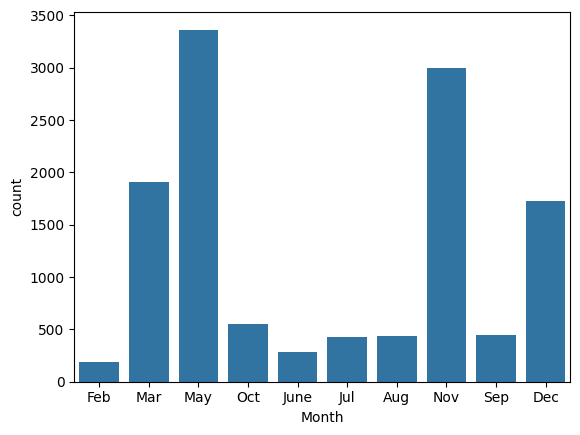

In [239]:
#Look at traffic (count of rows) by Month
sns.countplot(x='Month', data =df_clean)

<Axes: xlabel='Month', ylabel='count'>

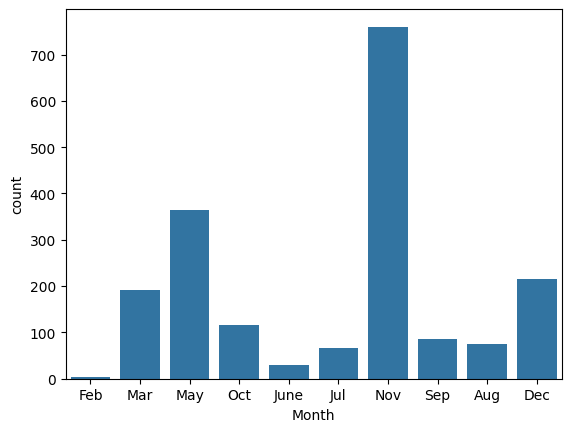

In [242]:
#subset data to only view when revenue is "true" i.e.: product sales:
df_rev=df[df['Revenue']==True]
#look at number of sales (Revenue = True) by month
sns.countplot(x='Month', data =df_rev)

<Axes: xlabel='Region', ylabel='count'>

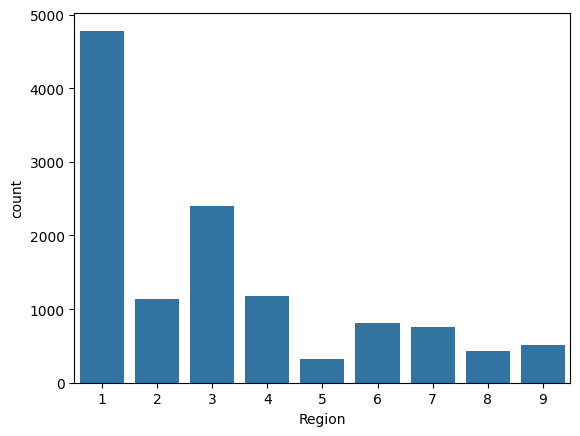

In [211]:
#traffic by region:
sns.countplot(x='Region', data =df)

<Axes: xlabel='Region', ylabel='count'>

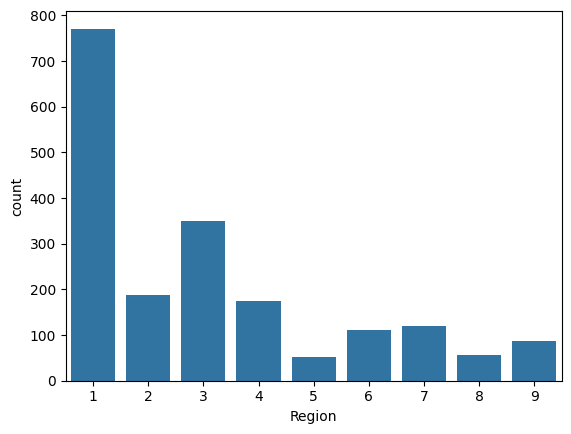

In [243]:
#look at number of sales by region
sns.countplot(x='Region', data =df_rev)

<Axes: xlabel='Weekend', ylabel='count'>

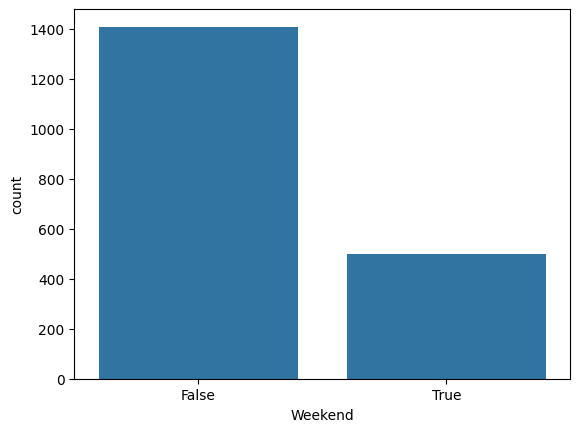

In [244]:
#understand if sales primarily occur on weekends or weekdays
sns.countplot(x='Weekend', data =df_rev)

<Axes: xlabel='Month', ylabel='count'>

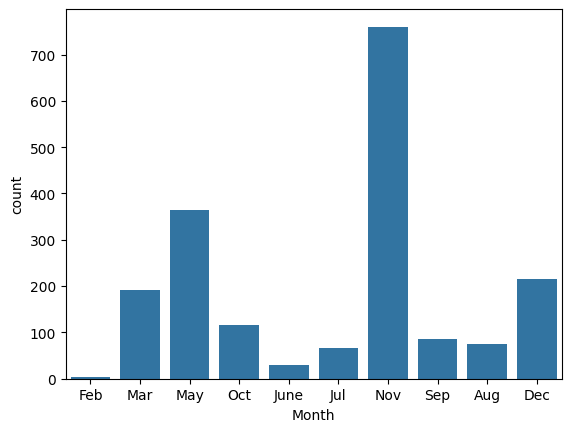

In [215]:
sns.countplot(x='Month', data =df_rev)

<Axes: xlabel='SpecialDay', ylabel='count'>

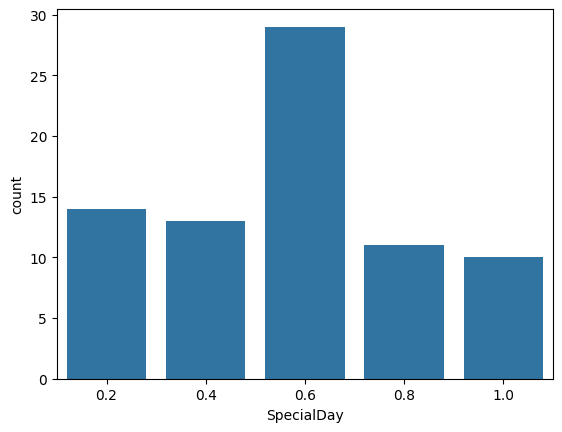

In [247]:
#See which holiday encourages the most sales
df['SpecialDay'].unique() 
df_rev_special=df_rev[df_rev['SpecialDay']>0]
sns.countplot(x='SpecialDay', data=df_rev_special)

<Axes: xlabel='SpecialPurchase', ylabel='count'>

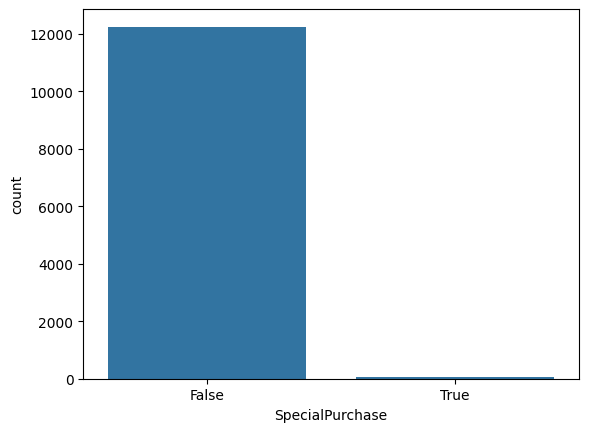

In [248]:
#understand if holidays are a main driver of sales
sns.countplot(x='SpecialPurchase', data=df)